In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [3]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
INSTITUTION_ID = "ins_109508"

In [6]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, public_key=PLAID_PUBLIC_KEY, secret=PLAID_SECRET, environment='sandbox')

### 2. Generate a public token

In [7]:
# YOUR CODE HERE
create_token = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [8]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_token['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [9]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'L7vzWkNA6zUxeGkwqqdZsy7nqJkyk9HPEqG9E',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'p8NdzBR6Zdcoj8K4ddPbIEGRDkxEx9CLzb3KQ',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'og4krzm6Qkhpe8q4wwRLtk3mwAbkbJTRb18KQ',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [10]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transactions_response = client.Transactions.get(access_token,start_date,end_date)

transactions_fetch = json.dumps(transactions_response['transactions'],indent=4, sort_keys=True)

print(transactions_fetch)


[
    {
        "account_id": "p8NdzBR6Zdcoj8K4ddPbIEGRDkxEx9CLzb3KQ",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-04-15",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": fals

# 2. Print the categories for each transaction

In [11]:
# YOUR CODE HERE
transactions = transactions_response['transactions']
categories = []
for t in transactions:
    category = t['category'][0]
    categories.append(category)
categories

['Payment',
 'Travel',
 'Transfer',
 'Transfer',
 'Recreation',
 'Travel',
 'Food and Drink',
 'Food and Drink',
 'Food and Drink',
 'Transfer',
 'Travel',
 'Travel',
 'Food and Drink',
 'Payment',
 'Food and Drink',
 'Shops']

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [12]:
# YOUR CODE HERE

dates = []
names = []
amounts = []

    
for t in transactions:
    
    dates.append(t['date'])
    amounts.append(t['amount'])
    names.append(t['name'])

print(dates, names, amounts)


['2020-04-15', '2020-04-15', '2020-04-14', '2020-04-14', '2020-04-13', '2020-04-13', '2020-04-12', '2020-04-12', '2020-04-11', '2020-04-10', '2020-03-31', '2020-03-29', '2020-03-26', '2020-03-25', '2020-03-25', '2020-03-25'] ['CREDIT CARD 3333 PAYMENT *//', 'Uber', 'ACH Electronic CreditGUSTO PAY 123456', 'CD DEPOSIT .INITIAL.', 'Touchstone Climbing', 'United Airlines', "McDonald's", 'Starbucks', 'SparkFun', 'INTRST PYMNT', 'United Airlines', 'Uber', 'Tectra Inc', 'AUTOMATIC PAYMENT - THANK', 'KFC', 'Madison Bicycle Shop'] [25, 5.4, 5850, 1000, 78.5, -500, 12, 4.33, 89.4, -4.22, 500, 6.33, 500, 2078.5, 500, 500]


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [13]:
# YOUR CODE HERE
df = pd.DataFrame()
df['dates'] = dates
df['categories'] = categories
df['names'] = names
df['amounts'] = amounts


In [14]:
df['dates'] = pd.to_datetime(df['dates'], format='%d%m%y', errors='ignore')
pd.DatetimeIndex(df['dates'])
df.index = pd.DatetimeIndex(df['dates'])
df['amounts'] = df['amounts'].astype('float')


In [15]:
df.drop(columns='dates', inplace=True)
df.head()

,categories,names,amounts
dates,,,
2020-04-15,Payment,CREDIT CARD 3333 PAYMENT *//,25.0
2020-04-15,Travel,Uber,5.4
2020-04-14,Transfer,ACH Electronic CreditGUSTO PAY 123456,5850.0
2020-04-14,Transfer,CD DEPOSIT .INITIAL.,1000.0
2020-04-13,Recreation,Touchstone Climbing,78.5


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [16]:
client.Income.get(access_token)

income_data = client.Income.get(access_token)

gross_inc = income_data['income']['last_year_income_before_tax']
month_inc = income_data['income']['income_streams'][0]['monthly_income']
proj_inc = income_data['income']['projected_yearly_income']

print(f" The previous year's gross income was ${gross_inc:,}. " )
print(f" The current month's income is ${month_inc:,}. " )
print(f" The projected net income for next year is ${proj_inc:,}. " )

ItemError: the requested product is not yet ready. please provide a webhook or try the request again later

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [17]:
category_expenses = df.groupby('categories')['amounts'].sum()
category_expenses
#instructions said to count number of transactions but for $amounts that didn't make sense. That's why I used
#the sum() function instead of the count function

categories
Food and Drink    1105.73
Payment           2103.50
Recreation          78.50
Shops              500.00
Transfer          6845.78
Travel              11.73
Name: amounts, dtype: float64

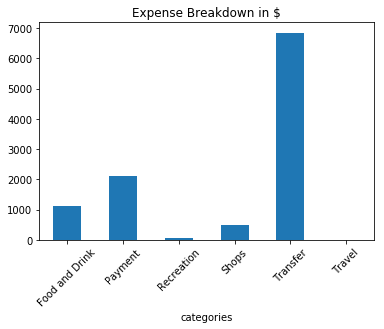

In [18]:
category_expenses.plot.bar(rot=45, title="Expense Breakdown in $")

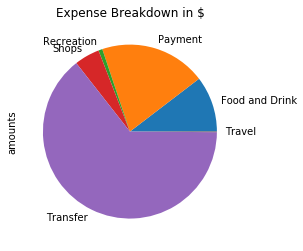

In [22]:
category_expenses.plot.pie(rot=45, title="Expense Breakdown in $")

### Calculate the expenses per month

In [19]:

trim_df = df.groupby('dates')['amounts'].sum()

expenses_month = trim_df.groupby(trim_df.index.month).sum()


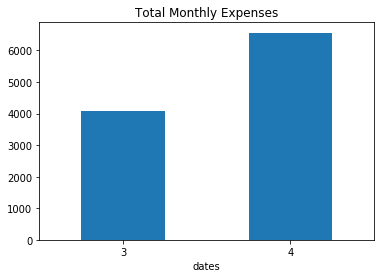

In [20]:
expenses_month.plot.bar(rot=360, title="Total Monthly Expenses")